In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt

In [2]:
model = load('../results/mnist')

In [4]:
#mnist
inp = model.layers[0].input
hid_layer = model.get_layer('winner_take_all_channel_1')
hid = hid_layer.output
out = model.layers[-1].output
enc = K.function([inp], hid)
dec = K.function([hid], out)

In [ ]:
np.random.seed(42)
xt = np.random.uniform(size=(9, 1, 28, 28))

for nbiter in (1,5,10):
    x = K.placeholder((None, 1, 28, 28))
    y = x
    for _ in range(nbiter):
        y = model(y)
    grad = K.gradients(y[:, :, 14, 14].mean(), x)
    get_grad = K.function([x], grad)

    y = get_grad([xt])
    y = grid_of_images_default(y, normalize=True)
    imsave('out{}.png'.format(nbiter), y)


In [5]:
x = np.zeros((1, 1, 28, 28))
x[:, :, 12:14, 12:14] = 1.0
xlist = [x]
hlist = []
for i in range(99):
    h = enc([x])
    x = dec([h])
    xlist.append(x)
    hlist.append(h)
x = np.concatenate(xlist, axis=0)
h = np.concatenate(hlist, axis=0)
im = grid_of_images_default(x)
imsave('out.png', im)

/home/mcherti/miniconda/envs/py3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


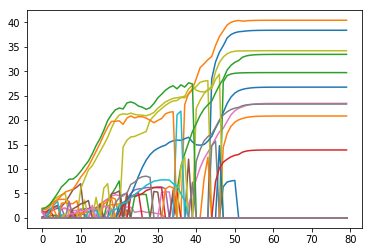

In [34]:
hm  = h.max(axis=(2, 3))
plt.plot(hm[0:80])

In [33]:
hh = h[20:21].copy()
#hh[:, 91] = 0
#hh[:, 58] = 0
#hh[:, 102] = 0
x = dec([hh])
x = grid_of_images_default(x)
imsave('out.png', x)

/home/mcherti/miniconda/envs/py3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
